# Example Map Plotting

In [ ]:
# By line: RRB 2020-07-20
# Script aims to:
# - Load a netCDF file
# - Extract one variable: CO
# - Create contour plot of variable as world map with coastlines
# - Add cyclic point
# - Customize contours and colorbar
# - Add axes labels
# - Add grid lines

### At the start of a Jupyter notebook you need to import all modules that you will use.

In [2]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs                 # For plotting maps
import cartopy.feature as cfeature         # For plotting maps
from cartopy.util import add_cyclic_point  # For plotting maps
from pathlib import Path                   # System agnostic paths
import xarray as xr                        # For loading the data arrays
import numpy as np                         # For array creation and calculations
from matplotlib.colors import BoundaryNorm

### Define the directories and file of interest for your results.

In [2]:
result_dir = Path("/home/buchholz/Documents/code_database/untracked/my-notebook/CAM_Chem_examples")
file = "CAM_chem_merra2_FCSD_1deg_QFED_monthoutput_CO_201801.nc"
file_to_open = result_dir / file
#the netcdf file is now held in an xarray dataset named 'nc_load' and can be referenced later in the notebook
nc_load = xr.open_dataset(file_to_open)
#to see what the netCDF file contains, uncomment below
#nc_load

### Extract the variable of choice at the time and level of choice

In [3]:
#extract variable
var_sel = nc_load['CO']
#print(var_sel)

#select the surface level at a specific time and convert to ppbv from vmr
#select the surface level for an average over three times and convert to ppbv from vmr
var_srf = var_sel.isel(time=0, lev=55)
var_srf = var_srf*1e09 # 10-9 to ppb
print(var_srf.shape)

#extract grid variables
lat = var_sel.coords['lat']
lon = var_sel.coords['lon']

(192, 288)


### Add cyclic point to avoid white stripe at lon=0.

In [4]:
var_srf_cyc, lon_cyc = add_cyclic_point(var_srf, coord=lon) 

### Plot the value over the globe.

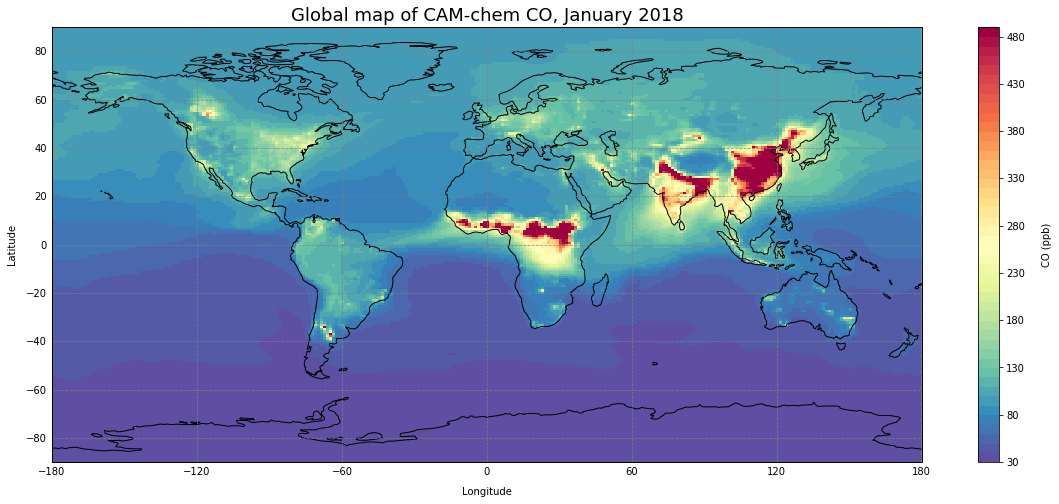

In [20]:
plt.figure(figsize=(20,8))

#Define projection
ax = plt.axes(projection=ccrs.PlateCarree())

#define contour levels
cmap = plt.get_cmap('Spectral_r')
clev = np.arange(30, 500, 10)

#plot the data
#plt.contourf(lon_cyc,lat,var_srf_cyc,clev,cmap='Spectral_r',extend='both')
norm = BoundaryNorm(clev, ncolors=cmap.N, clip=True)
plt.pcolormesh(lon_cyc,lat,var_srf_cyc,cmap=cmap, norm=norm)


# add coastlines
ax.add_feature(cfeature.COASTLINE)

#add lat lon grids
gl = ax.gridlines(draw_labels=True, color='grey', alpha=0.8, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

# Titles5
# Main
plt.title("Global map of CAM-chem CO, January 2018",fontsize=18)

# y-axis
ax.text(-0.04, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)
# x-axis
ax.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
        rotation='horizontal', rotation_mode='anchor',
        transform=ax.transAxes)
# legend
ax.text(1.15, 0.5, 'CO (ppb)', va='bottom', ha='center',
        rotation='vertical', rotation_mode='anchor',
        transform=ax.transAxes)

plt.colorbar()
plt.show() 

### Area weighted regridding

In [38]:
re=6.37122e06                       # Earth radius (in metres)
rad=4.0 * np.arctan(1.0) / 180.0    # Convert degrees to radians (pi radians per 180 deg)
con  = re * rad                     # constant for determining arc length 

Original grid

In [48]:
dlon = lon[2].values-lon[1].values
dlat = lat[2].values-lat[1].values
clat = np.cos(lat * rad)            # cosine of latitude
dx = con * dlon * clat              #dx (in metres) at each latitude
dy = con * dlat                     #dy (in metres) is constant
dydx = dy * dx                      #dydx(nlat)

(192,)

In [ ]:
area_wgt = new((/nlat, mlon/), float)

In [50]:
var_srf

<xarray.DataArray 'CO' (lat: 192, lon: 288)>
array([[34.263374, 34.263374, 34.263374, ..., 34.263374, 34.263374,
        34.263374],
       [34.273262, 34.273815, 34.27434 , ..., 34.271637, 34.272087,
        34.272644],
       [34.295147, 34.295845, 34.29653 , ..., 34.292988, 34.293705,
        34.29443 ],
       ...,
       [98.857635, 98.86089 , 98.86414 , ..., 98.82592 , 98.83818 ,
        98.85041 ],
       [99.00884 , 99.01235 , 99.01824 , ..., 98.995674, 98.998726,
        99.00218 ],
       [99.633125, 99.633125, 99.633125, ..., 99.633125, 99.633125,
        99.633125]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lev      float64 992.5
    time     datetime64[ns] 2018-02-01

In [ ]:
     wgt  = new((/nlat, mlon/), float)
     wgt  = conform(wgt, dydx, 0)
      wgt!0 = "lat"
      wgt&lat = newlat
      wgt!1 = "lon"
      wgt&lon = lon

In [54]:
oldlat = xr.DataArray(np.linspace(89.875,-89.875,720).astype('float32'))
oldlat.attrs ['long_name'] = 'latitude'
oldlat.attrs ['units'] = 'degrees_north'
oldlon = xr.DataArray(np.linspace(-179.875,179.875,1440).astype('float32'))
oldlon.attrs ['long_name'] = 'longitude'
oldlon.attrs ['units'] = 'degrees_east'

In [61]:
dlon_old = oldlon[2].values-oldlon[1].values
from math import gcd
gcd(0.25,1.25)

TypeError: 'float' object cannot be interpreted as an integer

In [4]:
a = np.array([[0,1,2],[2,2,3]])
print(a.shape)
weights = np.array([16,4,2])
print(weights.shape)
np.dot(a,weights)

(2, 3)
(3,)


array([ 8, 46])

In [ ]:
a = np.repeat(3, 4)